# Vizualise WT1-specific TCRs in clusters

In [1]:
# Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.backends.backend_pdf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx


# Change default size of figures
plt.rcParams['figure.figsize'] = [15, 15]

### DIR

In [2]:
project_dir = 'path_to_your_dir'
results_dir = os.path.join(project_dir, 'results/wt1_visualization/PRJNA510967')

In [3]:
# Create graph from edges
edges = pd.read_csv(os.path.join(results_dir, 'edges.txt'), sep='\t', header=None)

# Entire graph
G_all = nx.from_pandas_edgelist(edges, source=0, target=1)
print(G_all.number_of_nodes())

# Retrieve all Response info
df = pd.read_csv(os.path.join(results_dir, 'All_tcrs.tsv'), sep='\t')

721


### 1.1 Graph with response annotation

In [4]:
# Add colors to graph
complete_remission = df[df['Response'] == 'Complete_remission']['CDR3_beta'].tolist()
relapse = df[df['Response'] == 'Relapse']['CDR3_beta'].tolist()
healthy = df[df['Response'] == 'Healthy']['CDR3_beta'].tolist()
shared_cancer = list(set(complete_remission) & set(relapse))
cr_healthy = list(set(complete_remission) & set(healthy))
relapse_healthy = list(set(relapse) & set(healthy))

# Colorblind palette: https://davidmathlogic.com/colorblind/#%23161717-%23785EF0-%23DC267F-%23FE6100-%23FFB000-%2304791C
def assign_colors(graph, complete_remission, relapse, healthy,shared_cancer,cr_healthy,relapse_healthy):
    color_map = []
    for node in graph:
        if node in shared_cancer:
            color_map.append('#FE6100')
        elif node in cr_healthy:
            color_map.append('#785EF0')
        elif node in relapse_healthy:
            color_map.append('#C2DEC8')
        elif node in complete_remission:
            color_map.append('#04791C')
        elif node in relapse: 
            color_map.append('#DC267F')
        elif node in healthy:
            color_map.append('#FFB000')
    return color_map
  
# Color legend
patch1 = mpatches.Patch(color='#FE6100', label='Complete remission and relapse')
patch2 = mpatches.Patch(color='#785EF0', label='Complete remission and heatlhy')
patch3 = mpatches.Patch(color='#C2DEC8', label='Relapse and healthy')
patch4 = mpatches.Patch(color='#04791C', label='Complete remission')
patch5 = mpatches.Patch(color='#DC267F', label='Relapse')
patch6 = mpatches.Patch(color='#FFB000', label='Healthy')
color_legend = [patch1, patch2, patch3, patch4, patch5, patch6]

In [5]:
list(set(relapse) & set(healthy) & set(complete_remission))

[]

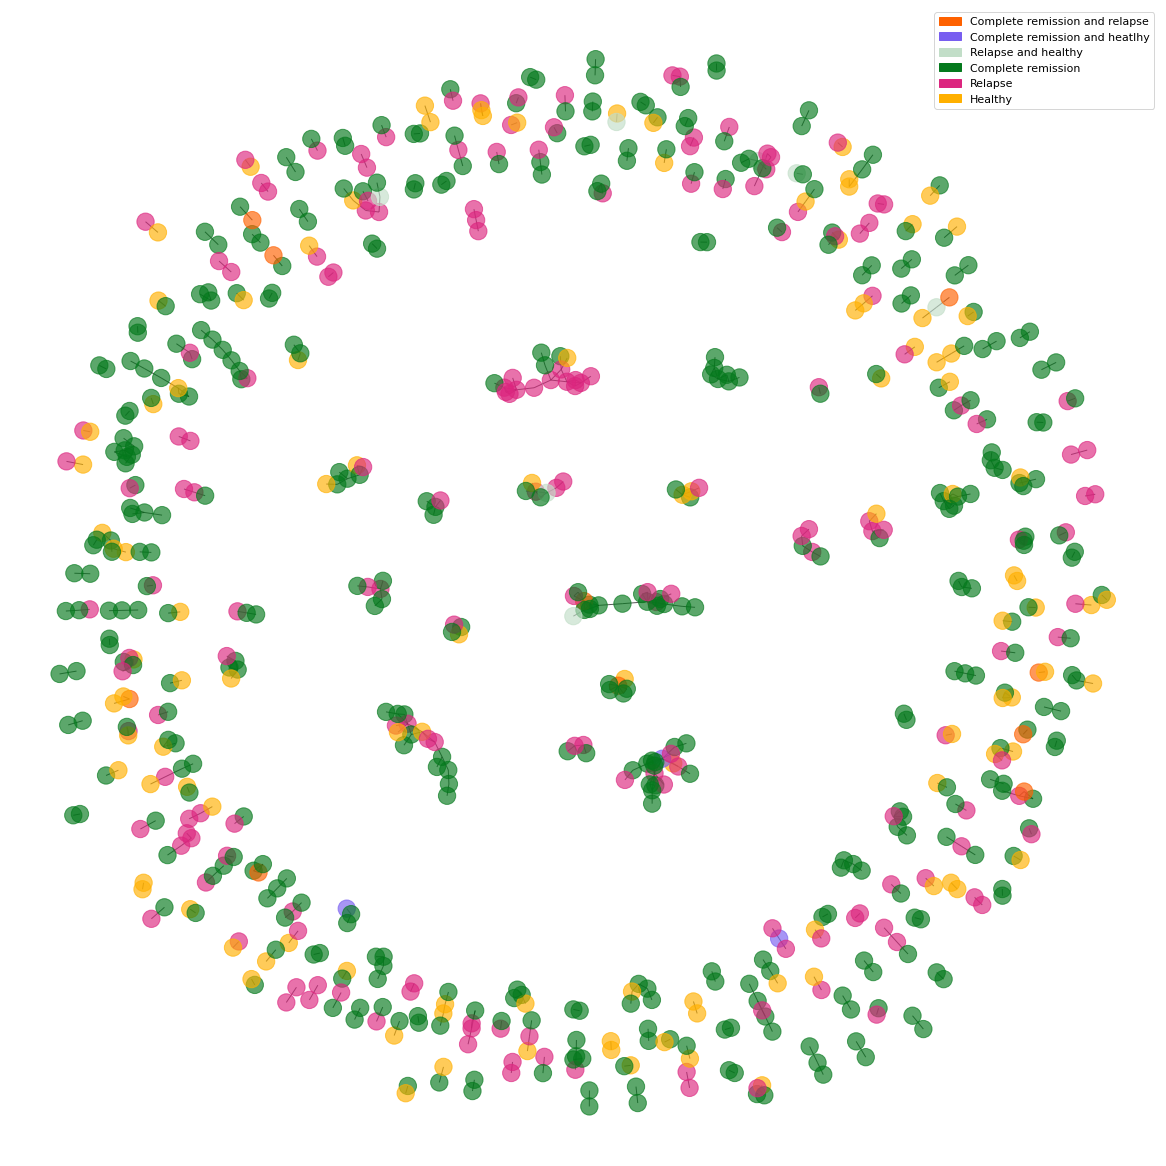

In [6]:
# Draw graph with colors
plt.rcParams['figure.figsize'] = [16, 16]
color_map = assign_colors(G_all, complete_remission, relapse, healthy, shared_cancer, cr_healthy, relapse_healthy)
pos = nx.spring_layout(G_all, seed=1)
nx.draw(G_all, pos = pos,node_color = color_map, with_labels = False,alpha=0.65)
plt.legend(loc='best', handles=color_legend, fontsize=11)
plt.savefig(os.path.join(results_dir, 'aml_clusters.pdf'))

### 1.2 Graph with WT1-specificity annotation

In [7]:
# Collect TCRex results
tcrex_dir = os.path.join(project_dir,
                         'results/tcrex_tcrdb_aml/combined_PRJNA510967/results')
files = os.listdir(tcrex_dir)
files.remove('.DS_Store')
tcrex_results = pd.DataFrame(columns=['TRBV_gene', 'CDR3_beta',
                                      'TRBJ_gene', 'epitope'])
for file in files:
    data = pd.read_csv(os.path.join(tcrex_dir, file, 'filtered_results.tsv'),
                       skiprows=[0, 1, 2, 3, 4, 5, 6], sep='\t')
    data = data[['TRBV_gene', 'CDR3_beta', 'TRBJ_gene', 'epitope']]
    tcrex_results = tcrex_results.append(data)
tcrex_126 = tcrex_results[tcrex_results['epitope'] == 'WT1-126_count1']
tcrex_126 = tcrex_126['CDR3_beta'].tolist()
tcrex_37 = tcrex_results[tcrex_results['epitope'] == 'WT1-37_count1']
tcrex_37 = tcrex_37['CDR3_beta'].tolist()

# Collect train data
data_37 = pd.read_csv(os.path.join(project_dir,
                                   'data/parsed_data/tcrex_training_data/WT1-37_count1/20210811_target.tsv'),
                      sep='\t')
train_37 = data_37['CDR3_beta'].tolist()
data_126 = pd.read_csv(os.path.join(project_dir,
                                    'data/parsed_data/tcrex_training_data/WT1-126_count1/20210811_target.tsv'),
                       sep='\t')
train_126 = data_126['CDR3_beta'].tolist()

# Combine TCRex and train CDRs
all_37 = set(train_37 + tcrex_37)
all_126 = set(train_126 + tcrex_126)

In [8]:
# Add colors to graph
# Colorblind palette: https://davidmathlogic.com/colorblind/#%23FFC20A-%230C7BDC-%23989898
def assign_colors(graph, all_37, all_126):
    color_map = []
    for node in graph:
        if node in all_37:
            color_map.append('#0C7BDC')
            print(node)
        elif node in all_126: 
            color_map.append('#FFC20A') 
            print(node)
        else:
            color_map.append('#989898') 
            
    return color_map
  
# Color legend
patch1 = mpatches.Patch(color='#0C7BDC', label='WT1-37 TCRs')
patch2 = mpatches.Patch(color='#FFC20A', label='WT1-126 TCRs')
patch3 = mpatches.Patch(color='#989898', label='Non-specific TCRs')
color_legend = [patch1, patch2, patch3]

CASSPGYEQYF
CASSLGTEAFF
CASSLGQAYEQYF
CASSPGQGYEQYF
CASSSGTGAYEQYF
CASSLGGNQPQHF
CASSLGSNQPQHF
CSVEGGSSYEQYF


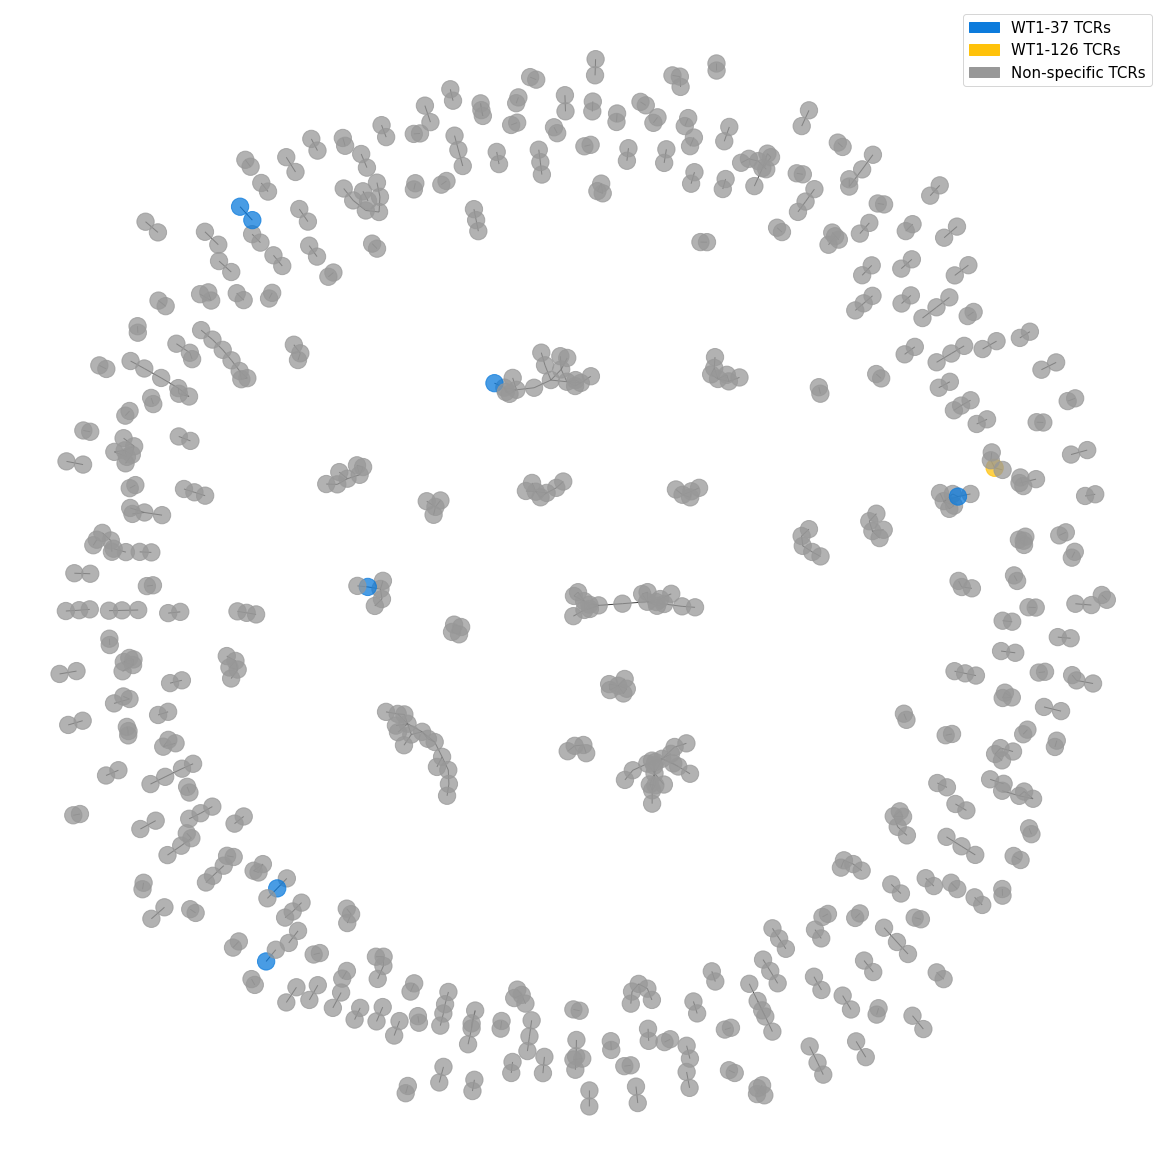

In [9]:
# Draw graph with colors
plt.rcParams['figure.figsize'] = [16, 16]
color_map = assign_colors(G_all, all_37, all_126)
pos = nx.spring_layout(G_all, seed=1)
nx.draw(G_all, pos = pos,node_color = color_map, with_labels = False,alpha=0.75)
plt.legend(loc='best', handles=color_legend, fontsize=15)
plt.savefig( os.path.join(results_dir, 'wt1_clusters.pdf'))